# Delight SED and Filters

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- Creation date : April 4th th 2021
- Update October 23th 2021
- **CCIN2P3 : kernel anaconda3pbspzrail**


- Last verification : January 5th 2022

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)
import scipy.stats
import sys
import os
sys.path.append('../')
from delight.io import *
from delight.utils import *
from delight.photoz_gp import PhotozGP

In [2]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

## SED

In [3]:
basedelight_datapath_sed = "../../../data/SED" 

### CWW SED

In [4]:
#ls ../data/BROWN_SEDs

In [5]:
files_sed_cww=["El_B2004a.dat","SB2_B2004a.dat","Sbc_B2004a.dat","ssp_25Myr_z008.dat","Im_B2004a.dat","SB3_B2004a.dat","Scd_B2004a.dat","ssp_5Myr_z008.dat"]

In [6]:
data_sed_cww= []
topdir = os.path.join(basedelight_datapath_sed,"CWW_SEDs")

for file in files_sed_cww:
    fullfilename=os.path.join(topdir,file)
    data=np.loadtxt(fullfilename)
    data_sed_cww.append(data)

(0.01, 100.0)

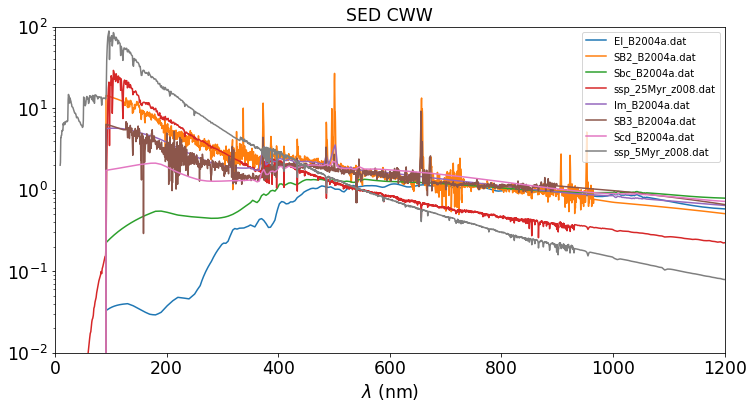

In [7]:
for idx in np.arange(len(data_sed_cww)):
    data=data_sed_cww[idx]
    x=data[:,0]/10
    y=data[:,1]
    plt.plot(x,y,"-",label=files_sed_cww[idx])
    
plt.legend()
plt.title("SED CWW")
plt.xlabel("$\lambda$ (nm)")
plt.xlim(0,1200)
plt.yscale("log")
plt.ylim(1e-2,1e2)

## Filters

In [15]:
basedelight_datapath = "../../../data" 

In [16]:
topdir_filters = os.path.join(basedelight_datapath,"FILTERS")

In [13]:
files_filters_lsst=["lsst_u.res","lsst_g.res","lsst_r.res","lsst_i.res","lsst_z.res","lsst_y.res"]

In [17]:
data_lsst_filters= []

color=['b','g','r','y',"grey","k"]
for file in files_filters_lsst:
    fullfilename=os.path.join(topdir_filters,file)
    data=np.loadtxt(fullfilename)
    data_lsst_filters.append(data)

(300.0, 1200.0)

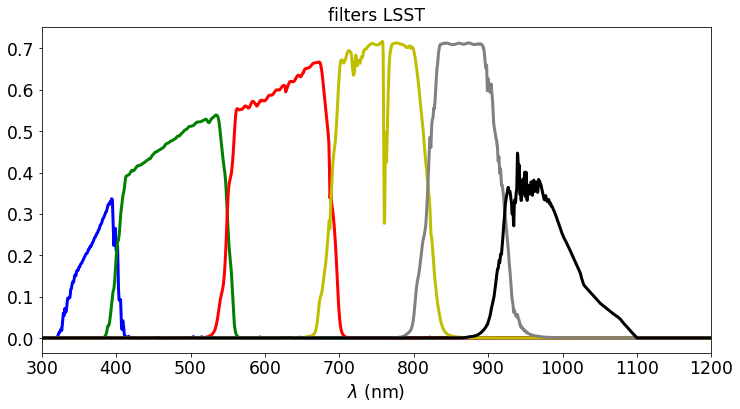

In [18]:
for idx in np.arange(len(data_lsst_filters)):
    data=data_lsst_filters[idx]
    x=data[:,0]/10
    y=data[:,1]
    plt.plot(x,y,"-",color=color[idx],label=files_filters_lsst[idx],lw=3)
    
#plt.legend()
plt.title("filters LSST")
plt.xlabel("$\lambda$ (nm)")
plt.xlim(300,1200)

# Combine

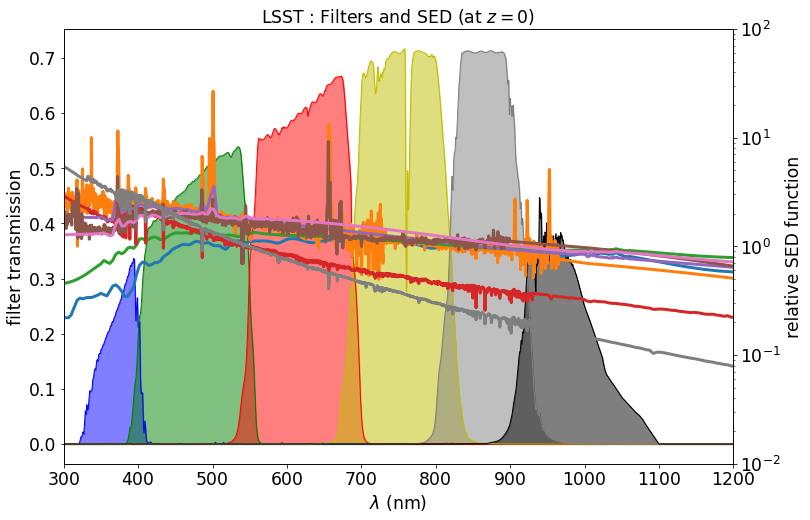

In [19]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
for idx in np.arange(len(data_lsst_filters)):
    data=data_lsst_filters[idx]
    x=data[:,0]/10
    y=data[:,1]
    ax.plot(x,y,"-",color=color[idx],label=files_filters_lsst[idx],lw=1)
    ax.fill_between(x, y,color=color[idx],alpha=0.5)
  
ax2 = ax.twinx()

for idx in np.arange(len(data_sed_cww)):
    data=data_sed_cww[idx]
    x=data[:,0]/10
    y=data[:,1]
    ax2.plot(x,y,"-",label=files_sed_cww[idx],lw=3)

ax2.set_yscale("log")
ax2.set_ylim(1e-2,1e2)
ax2.set_ylabel("relative SED function")


ax.set_title("LSST : Filters and SED (at $z=0$)")
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("filter transmission")
ax.set_xlim(300,1200)

plt.show()